In [23]:
import numpy as np
import pandas as pd

# Chatgpt Reviews

In [24]:
from google.colab import files

In [25]:
f = files.upload()

Saving chatgpt_reviews.csv to chatgpt_reviews (1).csv


In [26]:
df = pd.read_csv('chatgpt_reviews.csv')

In [27]:
df.head()

,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39


In [28]:
df["Ratings"].value_counts()

,count
Ratings,
5,150215
4,22897
1,12083
3,8157
2,3375


In [29]:
def classify(rating):
  if rating >= 4:
    return "positive"
  elif rating == 3:
    return "neutral"
  else:
    return "negative"

In [30]:
df["Category"]=df["Ratings"].apply(classify)
df.head()

,Review Id,Review,Ratings,Review Date,Category
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05,positive
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18,positive
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59,positive
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50,positive
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39,positive


*Sentiment* Analysis

In [31]:
df["Category"].value_counts()

,count
Category,
positive,173112
negative,15458
neutral,8157


In [32]:
df['Category'].value_counts(normalize = True)*100

,proportion
Category,
positive,87.996055
negative,7.857589
neutral,4.146355


87% of the user find chatgpt to be *Positive* - Overall user feedback entire lifetime of data

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196727 entries, 0 to 196726
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Review Id    196727 non-null  object
 1   Review       196721 non-null  object
 2   Ratings      196727 non-null  int64 
 3   Review Date  196727 non-null  object
 4   Category     196727 non-null  object
dtypes: int64(1), object(4)
memory usage: 7.5+ MB


In [34]:
df['Review Date'].min()

'2023-07-25 15:01:35'

In [35]:
df['Date'] = df['Review Date'].str[0:10]

In [36]:
df.head()

,Review Id,Review,Ratings,Review Date,Category,Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05,positive,2024-08-23
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18,positive,2024-08-23
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59,positive,2024-08-23
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50,positive,2024-08-23
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39,positive,2024-08-23


In [37]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196727 entries, 0 to 196726
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Review Id    196727 non-null  object        
 1   Review       196721 non-null  object        
 2   Ratings      196727 non-null  int64         
 3   Review Date  196727 non-null  object        
 4   Category     196727 non-null  object        
 5   Date         196727 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 9.0+ MB


In [38]:
Latest_date = df['Date'].max()
Latest_date

Timestamp('2024-08-23 00:00:00')

Last 7 and 30 days sentiment Analysis - Recent feedback

In [39]:
last_7_days_start = Latest_date - pd.Timedelta(days=7)
reviews_last_7_days = df[df['Date'] >= last_7_days_start]
print("Sentiment Analysis for Last 7 Days:")
print(reviews_last_7_days['Category'].value_counts(normalize=True) * 100)

last_30_days_start = Latest_date - pd.Timedelta(days=30)
reviews_last_30_days = df[df['Date'] >= last_30_days_start]
print("\nSentiment Analysis for Last 30 Days:")
print(reviews_last_30_days['Category'].value_counts(normalize=True) * 100)

Sentiment Analysis for Last 7 Days:
Category
positive    89.175860
negative     6.956522
neutral      3.867618
Name: proportion, dtype: float64

Sentiment Analysis for Last 30 Days:
Category
positive    88.832430
negative     7.080142
neutral      4.087428
Name: proportion, dtype: float64


In [40]:
# Recent Analysis shows 88.5% percent positive feedback given by users for chatgpt

*Common problems driving negative reviews*


In [41]:
negative_reviews = df[df['Category'] == 'negative']

In [42]:
negative_reviews.sample(50)

,Review Id,Review,Ratings,Review Date,Category,Date
190861,6c028737-170f-47b5-a343-68c0cbb56f63,No plugins???,2,2023-08-03 19:49:03,negative,2023-08-03
56997,f4fe840b-adc5-4966-961d-e077677c685f,This company is simply unable to deliver a rel...,1,2024-06-12 12:47:26,negative,2024-06-12
146771,e32c3634-e623-4f76-84d0-3f06375a8add,Update latest data,1,2023-08-18 11:27:27,negative,2023-08-18
93885,f3d3a33c-cd5e-4ab8-b882-e1e67fb2f96b,Many things I love about the app. But I use it...,2,2023-09-09 18:27:47,negative,2023-09-09
90641,7e2e78b8-bd89-44e2-b1a1-3663ecaec452,It's actually a great app. But it suddenly sto...,1,2024-04-19 17:54:26,negative,2024-04-19
106126,6ff4dbca-a8b4-4f00-a702-990fc2f71518,It's really good and helpful but recently it's...,2,2023-10-03 06:41:02,negative,2023-10-03
95134,88c4f69c-01af-415b-983f-6a800a1fe46c,It's giving error while in login process,1,2024-03-12 10:09:57,negative,2024-03-12
145424,3a77ed1b-3b81-4b20-b7b4-094aa44cdd11,Error.... invalid birthday,1,2023-07-25 15:35:35,negative,2023-07-25
79673,45c9ba47-b0e4-4861-b38d-e2c40c3304f8,Gmail Login problem,1,2024-05-17 09:49:40,negative,2024-05-17
83096,5a7c0c6f-fb9e-4f6b-90ba-7c4babe2220c,no photos,2,2024-05-12 14:01:42,negative,2024-05-12


In [43]:
#some answers - lag, limit exhaust, pricing, glitchy, not so recent, not reliable

In [44]:
#some false cases

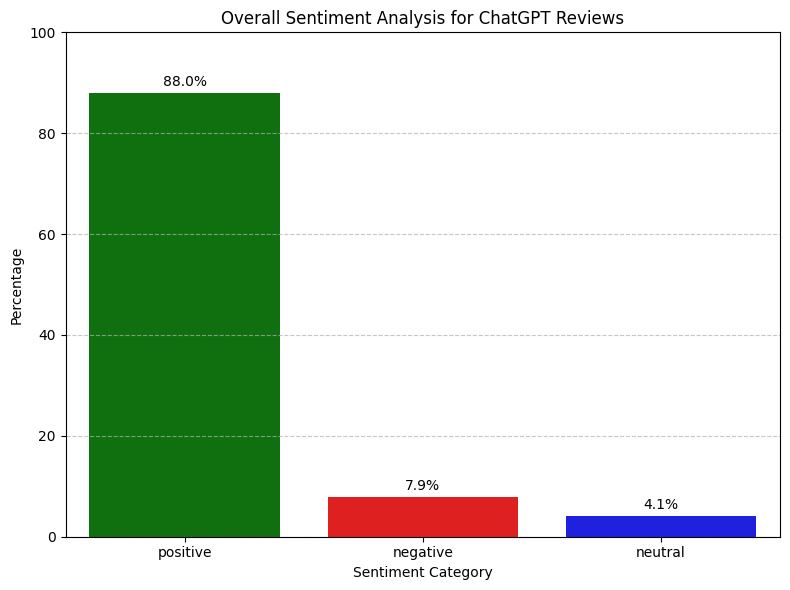

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

overall_sentiment = df['Category'].value_counts(normalize=True) * 100

# Prepare data for plotting
plot_data_overall = pd.DataFrame({
    'Category': overall_sentiment.index,
    'Percentage': overall_sentiment.values
})

# Define a consistent color palette
sentiment_colors = {'positive': 'green', 'negative': 'red', 'neutral': 'blue'}

# Create the bar chart
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=plot_data_overall,
    x='Category',
    y='Percentage',
    palette=sentiment_colors,
    hue='Category',
    legend=False
)

# 🔹 Add percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.1f}%',                      # format to 1 decimal
        (p.get_x() + p.get_width() / 2., height),
        ha='center',
        va='bottom',
        fontsize=10,
        xytext=(0, 3),                          # slight vertical offset
        textcoords='offset points'
    )

# Titles and labels
plt.title('Overall Sentiment Analysis for ChatGPT Reviews')
plt.ylabel('Percentage')
plt.xlabel('Sentiment Category')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


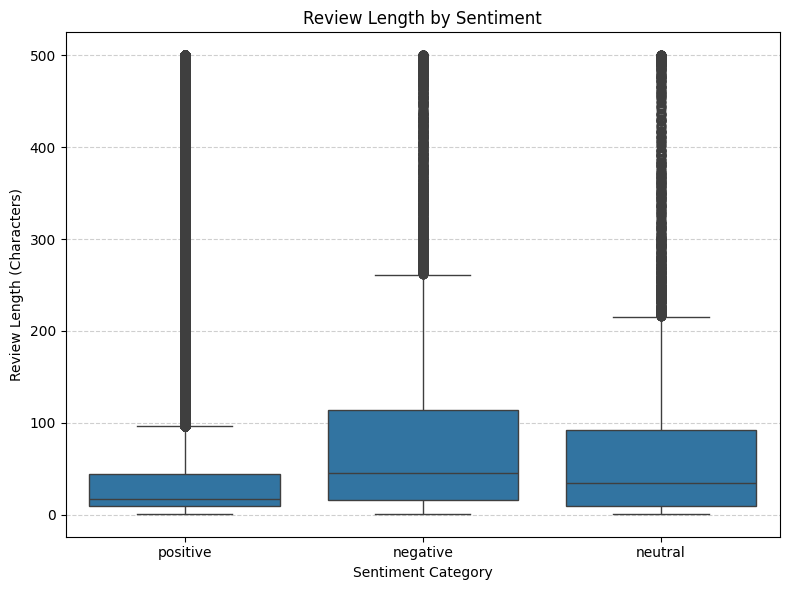

In [47]:
df['Review_Length'] = df['Review'].astype(str).apply(len)

plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x='Category',
    y='Review_Length'
)

plt.title('Review Length by Sentiment')
plt.xlabel('Sentiment Category')
plt.ylabel('Review Length (Characters)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()